# MolSSI Workshop
## 1. Introduction

This lesson covers Python basics!!
http://education.molssi.org/python_scripting_cms/02-file_parsing/index.html

In [1]:
deltaH, deltaS, temp = -541.5, 10.4, 298
deltaG = deltaH - temp*deltaS
print(deltaG)
type(deltaG)
deltaG_string = str(deltaG)
type(deltaG_string)
deltaG_int = int(deltaG)
print(deltaG_int)

-3640.7000000000003
-3640


## 2. File Parsing

In [10]:
# ls data
# pwd
import os

ethanol_file = os.path.join('data', 'outfiles', 'ethanol.out')
print(ethanol_file)
# could use "pathlib" to treat paths as objects
# open and read file
outfile = open(ethanol_file, "r") # r stands for read (w:write, a:append)
data = outfile.readlines()
# Should always close the file
outfile.close()

# Using context manager automatically handles the closing of the file
with open(ethanol_file, "r") as outfile:
    data = outfile.readlines()

# print the file
#for line in data:
#    print(line)

# searching in a file
for line in data:
    if 'Final Energy' in line:
        energy_line = line
        print(energy_line)
words = energy_line.split() # space is used by default
energy = words[3]
energy = float(energy) # changing the data type is called "casting"
energy_line.split(':') # or use a colon

# using enumerate, keep up with line numbers
#for line_num, line in enumerate(list):
# to start with index of "1", for line_num, line in enumerate(data, start=1):
# for line number that contains 'Center'

for linenum, line in enumerate(data):
    if 'Center' in line:
        print(linenum)
        print(line)
# remember count started at 0!
# use re (regular expressions) when looking for more specific patterns

data\outfiles\ethanol.out
  @DF-RHF Final Energy:  -154.09130176573018

77
       Center              X                  Y                   Z               Mass       



## 3. Processing Multiple Files and Writing Files

In [15]:
# accessing multiple files
file_location = os.path.join('data', 'outfiles', '*.out')
print(file_location)

import glob
filenames = glob.glob(file_location)
print(filenames)

datafile = open('energies.txt','w+') # opens file for writing

for f in filenames:
    # get the molecule name
    file_name = os.path.basename(f)
    split_filename = file_name.split('.')
    molecule_name = split_filename[0]
    
    outfile = open(f, 'r') # r:read
    data = outfile.readlines()
    outfile.close()
    for line in data:
        if 'Final Energy' in line:
            energy_line = line
            words = energy_line.split()
            energy = float(words[3])
            #print(molecule_name, energy)
            datafile.write(F'{molecule_name} \t {energy} \n') 
            # \t : tab, \n : newline
            
datafile.close() # IMPORTANT tells computer when to start writing

            
# os.path.basename helps get the name of the file
# use file_name.split('.') to get just the name of the molecule

# Writing
# w+ : open the file for writing and if the file does not exist, 
# create it
# w+ overwrites the file if it already exists, a+ will keep what 
# is already there, adds additional text




data\outfiles\*.out
['data\\outfiles\\butanol.out', 'data\\outfiles\\decanol.out', 'data\\outfiles\\ethanol.out', 'data\\outfiles\\heptanol.out', 'data\\outfiles\\hexanol.out', 'data\\outfiles\\methanol.out', 'data\\outfiles\\nonanol.out', 'data\\outfiles\\octanol.out', 'data\\outfiles\\pentanol.out', 'data\\outfiles\\propanol.out']


## 4. Working with Tabular Data

In [42]:
import numpy
import os

distance_file = os.path.join('data', 'distance_data_headers.csv')

distances = numpy.genfromtxt(fname=distance_file, delimiter=',', 
                             dtype='unicode')
# unicode for mixed data types

# manipulating tabular data
headers = distances[0] # first row are the headers
# to get the rest... distances[1:]
data = distances[1:]
# overwrite the data to get floats
data = data.astype(numpy.float)
print(data)
# data[0:10] takes first 10.. goes up to BUT NOT INCLUDING 10
# if no number included before :, automatically starts with 0
num_columns = len(data[0,:]) #Calculates number of columns
for i in range(1,num_columns): # doesn't include the first column
    column = data[:,i] # All rows, ith column
    avg_col = numpy.mean(column) # updates with each new column
    print(F'{headers[i]} : {avg_col}')
    
# Exercise

water_file = os.path.join('data', 'water.xyz')
water = numpy.genfromtxt(fname=water_file, skip_header=2, 
                         dtype='unicode')
atoms = water[:,0] # save atom names
num_atoms = len(atoms)
posdata = water[:,1:]
posdata = posdata.astype(numpy.float)
num_columns = len(data[0,:])


BLfile = open('bond_lengths.txt', 'w+')
# calculate the distance between molecules using their x, y and z posn.
for a in range(0, num_atoms):
    for b in range(0, num_atoms):
        if a<b:
            atom1 = atoms[a]
            atom2 = atoms[b]
            x1, y1, z1 = posdata[a,0], posdata[a,1], posdata[a,2]
            x2, y2, z2 = posdata[b,0], posdata[b,1], posdata[b,2]
            d = numpy.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)
            if d > 0 and d <= 1.5:
                print(F'{atom1} to {atom2} : {d:.3f}')
                BLfile.write(F'{atom1} to {atom2} : {d:.3f}\n')
                
BLfile.close()
        # note the :.3f to determine decimal display
# output file


[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]
THR4_ATP : 10.876950930000001
THR4_ASP : 7.342344959999999
TYR6_ATP : 11.209791329999998
TYR6_ASP : 10.9934435
O to H1 : 0.969
O to H2 : 0.969


## 5. Plotting and Data Visualization

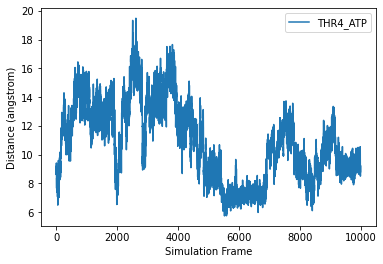

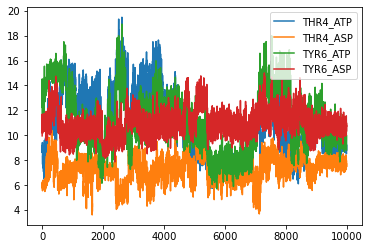

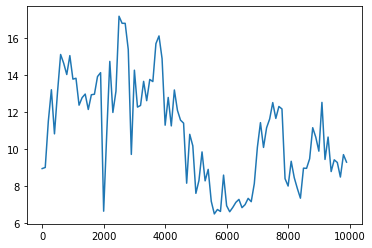

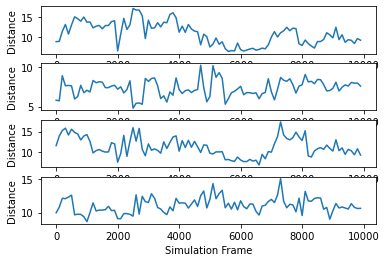

In [19]:
import os
import numpy
distance_file = os.path.join('data', 'distance_data_headers.csv')
distances = numpy.genfromtxt(fname=distance_file, delimiter=',', dtype='unicode')
headers = distances[0]
data = distances[1:]
data = data.astype(numpy.float)

import matplotlib.pyplot as plt
plt.figure() # initializes a figure
#plt.plot(data[:,1]) # all rows, second column
# xlabel, ylabel
sample = headers[1]
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
fig_1 = plt.plot(data[:,1], label=sample)
plt.legend()
plt.savefig(F'{sample}.png', dpi = 300)

# image resolution
# dpi, dots per inch, high res takes longer to save

plt.figure()
for col in range(1, len(headers)):
    fig = plt.plot(data[:, col], label=headers[col])
    plt.legend()


plt.legend()
plt.savefig('all_samples.png')
# plt.ylim(low_limit, high_limit)
# x variable is just a count
# array[start:stop:interval]
# data[0:10:2, :] every other row until the 10th row, every column
# data[0::100, 0] every 100th row for the 1st column

plt.figure()
plt.plot(data[0::100,0], data[0::100,1])
'''
character	description
'-'	solid line style
'--'	dashed line style
'-.'	dash-dot line style
':'	dotted line style
'.'	point marker
','	pixel marker
'o'	circle marker
'v'	triangle_down marker
'^'	triangle_up marker
'<'	triangle_left marker
'>'	triangle_right marker
'1'	tri_down marker
'2'	tri_up marker
'3'	tri_left marker
'4'	tri_right marker
's'	square marker
'p'	pentagon marker
'*'	star marker
'h'	hexagon1 marker
'H'	hexagon2 marker
'+'	plus marker
'x'	x marker
'D'	diamond marker
'd'	thin_diamond marker
'|'	vline marker
'_'	hline marker'''

'''
character	color
‘b’	blue
‘g’	green
‘r’	red
‘c’	cyan
‘m’	magenta
‘y’	yellow
‘k’	black
‘w’	white
'''
# subplot

fig, ax = plt.subplots(len(headers)-1, 1, figsize=(10,10), sharey=True) # 1 column
# sharey is same y axes
for col in range(1, len(headers)): # skip first column, counter
    sample = headers[col]
    
    ax[col-1].plot(data[0::100,0], data[0::100,col], label=sample)
    ax[col-1].set_xlabel('Simulation Frame')
    ax[col-1].set_ylabel('Distance')

## 6. Writing Functions

In [ ]:
# Function = only 1 task
# default arguments
# defbond_check(minimum_len=0, max_len=1.5): # can change the values of these




## 7. Running code from the Linux Command Line

In [20]:
import argparse
# used to make scripts with command line arguments
parser = argparse.ArgumentParser(description="This script analyzes a user given xyz file and out puts the length of the bonds.")
parser.add_argument("xyz_file", help="The filepath for the xyz file to analyze.")


# when writing code with function definitions and main script, need to tell 
# python which is the main script, after import statmenets and functions,
# BEFORE argparse
# if __name__ == "__main__":
# add main script below

parser.add_argument('-minimum_length', help='The min distance.', type=float, default=0)


_StoreAction(option_strings=[], dest='xyz_file', nargs=None, const=None, default=None, type=None, choices=None, help='The filepath for the xyz file to analyze.', metavar=None)

## 8. Testing code with pytest

In [4]:
# testing each part of code individually - unit testing
# testing how all parts work together - integration testing

# runs all functions that start with "test"
# instead of return, use "assert" to test expected values
# in command prompt, run pytest -v (-v stands for verbose)
# test edge (1d) and corner (2d) cases

# raising errors
x = 1

if x == 1:
    raise ValueError("x cannot be 1") # Value error is the error type

# look up how to raise error during pytest... pytest.raises(ValueError)


ValueError: x cannot be 1

## 9. Version Control with git

## 10.